# Signature Recognition Using Machine Learning

What Is Signature Recognition?
Signature recognition is a biometric method of identifying individuals based on their unique signature patterns. It’s widely used for:

Authentication: Validating the legitimacy of a signature.
Forgery Detection: Identifying fraudulent signatures.
Secure Transactions: Ensuring that sensitive operations are performed by authorized personnel.

# Project Workflow

In [1]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


C:\Users\kalpana\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Step 2: Preprocessing

# Step 3: Feature Extraction

In [2]:
import cv2
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to extract features from a signature image
def extract_features(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Resize to a fixed size
    resized = cv2.resize(gray, (128, 128))
    
    # Apply thresholding (binarization)
    _, binary = cv2.threshold(resized, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Compute Histogram of Oriented Gradients (HOG) as features
    hog = cv2.HOGDescriptor()
    h = hog.compute(binary)
    
    return h.flatten()  # Convert to 1D feature vector

# Load dataset of valid and invalid signatures
def load_data(valid_path, invalid_path):
    X, y = [], []

    # Load valid signatures
    for filename in os.listdir(valid_path):
        img = cv2.imread(os.path.join(valid_path, filename))
        if img is not None:
            X.append(extract_features(img))
            y.append(1)  # Label: 1 for valid signatures

    # Load invalid inputs
    for filename in os.listdir(invalid_path):
        img = cv2.imread(os.path.join(invalid_path, filename))
        if img is not None:
            X.append(extract_features(img))
            y.append(0)  # Label: 0 for invalid signatures

    return np.array(X), np.array(y)

# Paths to valid and invalid signature datasets
valid_signatures_path = "C:\\Users\\kalpana\\Downloads\\sign_data\\sign_data\\valid"
invalid_signatures_path = "C:\\Users\\kalpana\\Downloads\\sign_data\\sign_data\\invalid"


# Step 4: Model Training

In [47]:

# Load dataset
X, y = load_data(valid_signatures_path, invalid_signatures_path)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear', C=0.1, gamma=0.1)
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Function to verify a new signature
def verify_signature(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to load image")
        return

    features = extract_features(img).reshape(1, -1)
    prediction = svm.predict(features)

    if prediction[0] == 1:
        print("Signature Verified: VALID")
    else:
        print("Signature Rejected: INVALID")


Model Accuracy: 77.78%


In [48]:
# Compute F1-score (for binary classification)
from sklearn.metrics import accuracy_score, f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')


F1 Score: 0.7500


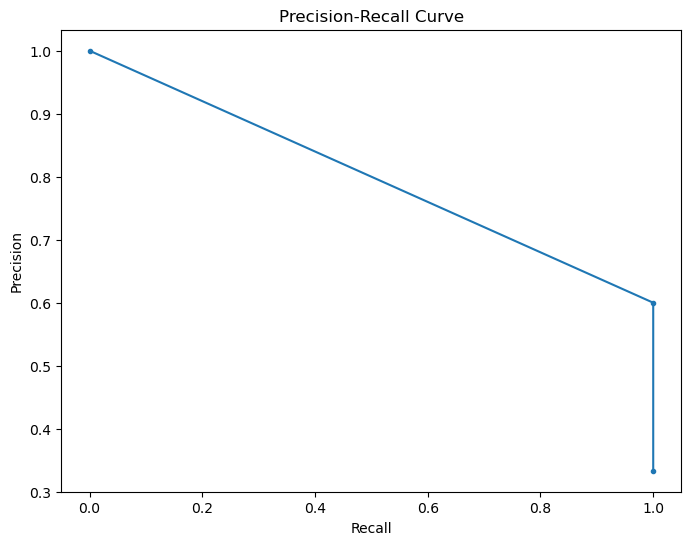

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision-recall curve data
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [50]:
threshold = 0.3  # Adjust this threshold as per your needs
y_pred_adjusted = (y_pred >= threshold).astype(int)

# Calculate the F1 Score with the adjusted threshold
f1_adjusted = f1_score(y_test, y_pred_adjusted)
print(f'F1 Score (Adjusted Threshold): {f1_adjusted:.2f}')


F1 Score (Adjusted Threshold): 0.75


In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [52]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(SVC(kernel='linear'), X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f}')


Cross-Validation Accuracy: 0.86


In [53]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4 2]
 [0 3]]


In [54]:
# Extract False Positives (FP) and False Negatives (FN)
FP = cm[0][1]
FN = cm[1][0]

print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")


False Positives (FP): 2
False Negatives (FN): 0


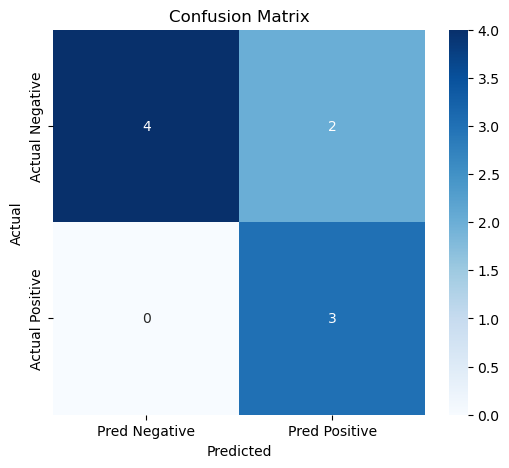

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [57]:
# Example test on a new signature
verify_signature("C:\\Users\\kalpana\\Downloads\\WhatsApp Image 2025-02-17 at 5.33.12 PM.jpeg")

Signature Verified: VALID


In [58]:
# Example test on a new signature
verify_signature("C:\\Users\\kalpana\\Downloads\\WhatsApp Image 2025-02-17 at 3.27.52 PM.jpeg")


Signature Verified: VALID


In [59]:
# Example test on a new signature
verify_signature("C:\\Users\\kalpana\\Downloads\\WhatsApp Image 2025-02-17 at 3.32.00 PM.jpeg")

Signature Rejected: INVALID


In [60]:
# Example test on a new signature
verify_signature("C:\\Users\\kalpana\\Downloads\\WhatsApp Image 2025-02-17 at 3.07.24 PM.jpeg")

Signature Verified: VALID
